<a href="https://colab.research.google.com/github/alvarocros/uche/blob/main/scikit_learn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$y = b_0 + b_1x$

In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [6]:
#datos = pd.read_excel("/content/drive/My drive/Documentos/Colab Notebooks/scikit-learn/oxigeno.xlsx")
datos = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRATqk_ux0caNoWXX9OsKBPU31Nm8E7m_4IAGcWrRj6rvVItIZPItr-pUhB-G8OGA/pub?gid=687335430&single=true&output=csv")
datos

,Reduccion de solidos,Reduccion de la demanda de oxigeno
0,3,5
1,7,11
2,11,21
3,15,16
4,18,16
5,27,28
6,29,27
7,30,25
8,30,35
9,31,30


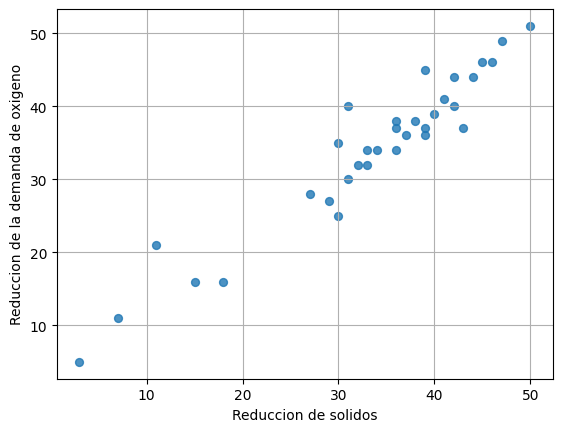

In [7]:
# @title Reduccion de solidos vs Reduccion de la demanda de oxigeno

from matplotlib import pyplot as plt
datos.plot(kind='scatter', x='Reduccion de solidos', y='Reduccion de la demanda de oxigeno', s=32, alpha=.8)
#plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid()
plt.show()

In [8]:
matriz = datos.to_numpy()
matriz

array([[ 3,  5],
       [ 7, 11],
       [11, 21],
       [15, 16],
       [18, 16],
       [27, 28],
       [29, 27],
       [30, 25],
       [30, 35],
       [31, 30],
       [31, 40],
       [32, 32],
       [33, 34],
       [33, 32],
       [34, 34],
       [36, 37],
       [36, 38],
       [36, 34],
       [37, 36],
       [38, 38],
       [39, 37],
       [39, 36],
       [39, 45],
       [40, 39],
       [41, 41],
       [42, 40],
       [42, 44],
       [43, 37],
       [44, 44],
       [45, 46],
       [46, 46],
       [47, 49],
       [50, 51]])

In [15]:
n = len(matriz)
sumatoria_x = np.sum(matriz[:,0])
sumatoria_y = np.sum(matriz[:,1])
sumatoria_producto = np.sum(matriz[:,0] * matriz[:,1])
sumatoria_cuadrado_x = np.sum(matriz[:,0] * matriz[:,0])
print("n:",n)
print("Sumatoria X: ", sumatoria_x)
print("Sumatoria Y: ", sumatoria_y)
print("Sumatoria del producto: ", sumatoria_producto)
print("Sumatoria cuadrado X: ", sumatoria_cuadrado_x)

n: 33
Sumatoria X:  1104
Sumatoria Y:  1124
Sumatoria del producto:  41355
Sumatoria cuadrado X:  41086
Sumatoria  cuadrado Y:  41998


In [16]:
b1 = (n * sumatoria_producto - sumatoria_x * sumatoria_y) / (n * sumatoria_cuadrado_x - sumatoria_x * sumatoria_x)
b0 = (sumatoria_y - b1 * sumatoria_x) / n

print("b1: ",b1)
print("b0: ",b0)

b1:  0.9036432105793231
b0:  3.829633197588709


##scickit-learn

In [17]:
clf = LinearRegression()


In [28]:
#Entrenamos el modelo
x = datos[["Reduccion de solidos"]]
y = datos[["Reduccion de la demanda de oxigeno"]]

clf.fit(x, y)

LinearRegression()

In [23]:
#Valor b1
clf.coef_

array([[0.90364321]])

In [24]:
#b0
clf.intercept_

array([3.8296332])

In [29]:
#Vamos a predecir valores

clf.predict([[7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[10.15513567]])

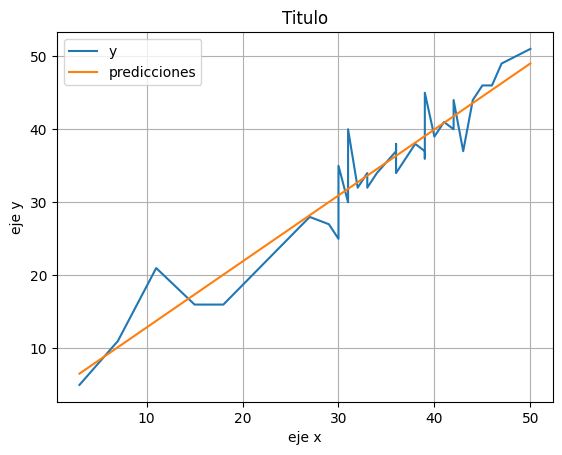

In [31]:
plt.plot(x,y)
plt.plot(x, clf.predict(x))
plt.title("Titulo")
plt.xlabel("eje x")
plt.ylabel("eje y")
plt.legend(["y", "predicciones"])
plt.grid()
plt.show()